# Задача семинара:

1. Сделать базовый класс нейрона.
2. Относледоваться для :
> 2.1.   Обучения с помощью Adaline  для метода пакетного градиентного спуска  
> 2.2.   Обучения с помощью стохастического градиентного спуска
3. Протестить на данных все три способа обучения + разобраться с реализованными в sklearn







# Часть 1. Базовый алгоритм

1. Инициализировать веса нулями либо малыми случайными значениями
2. Для каждого входного образца $x^{(i)}$ выполняем:
> 2.1 Вычисляем *y_pred*  
> 2.2. Обновляем веса *w*


$ w_j = w_j + \Delta w_j$  
$ \Delta w_j = \eta( y^{(i)} - y\_pred^{(i)} )x_j^{(i)}$,  где   
$\eta$  - темп обучения (константа между 0.0 и 1.0)  
$y^{(i)} $ - истинная метка класса  
$y\_pred^{(i)}$ - ответ, который получили



---


Т.е  
Получаем *y_pred* и   
$\Delta w_0 = \eta(y^{(i)} - y\_pred^{(i)})$  
$\Delta w_1 = \eta(y^{(i)} - y\_pred^{(i)})x_1$  
$\Delta w_2 = \eta(y^{(i)} - y\_pred^{(i)})x_2$  

Эти веса обновляются одновременно, мы не вычисляем $y\_pred^{(i)}$ до тех пор, пока все веса $ w_j$ не будут обновлены. 

In [0]:
import numpy as np

class Perceptron:
  """
  Атрибуты
  w - одномернй массив весов
  errors - число ошибочно классифицированных данных для каждой эпохи
  
  Методы
  
  __init__(какие должны быть параметры?)
  
  fit(какие должны быть параметры?)
  
  count_input(параметры, ю ноу какие)
  
  predict(тоже какие-то параметры)
  
  """
  
  def __init__(self, eta=0.01, n_iter=100):
    self.eta = eta
    self.n_iter = n_iter
    
    
  def fit(self, X, y):
    """
    X = [n_samples, n_features] - number of samples, number of features
    y = [n_samples] - target values
    """
    self.w_ = np.zeros(1 + X.shape[1])
    self.errors_ = []
    
    for _ in range(self.n_iter):
      errors = 0
      
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
        
      self.errors_.append(errors)
    return self
    
  def count_input(self, X):
    """
    Считаем чистый вход
    """
    return X @ self.w_[1:] + self.w_[0]

  def predict(self, X):
    """
    Вернуть метку класса
    """
    return 1 if self.count_input(X) >= 0.0 else -1
      

In [0]:
# testing perceptron
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# preparing data
df = pd.read_csv(url, header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

In [0]:
X.head()

NameError: ignored

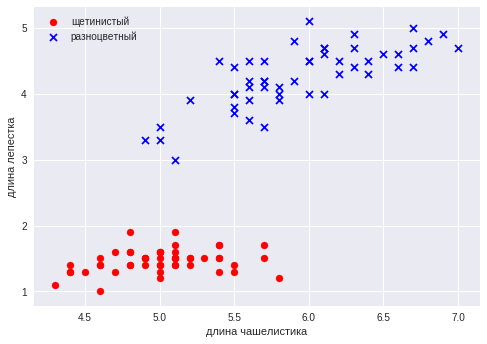

In [0]:
# make pretty
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='щетинистый')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='разноцветный')

plt.xlabel('длина чашелистика')
plt.ylabel('длина лепестка')

plt.legend(loc='upper left')
plt.show()

In [0]:
#train model
simple_perceptron = Perceptron(eta=0.1, n_iter=10)
simple_perceptron.fit(X, y)

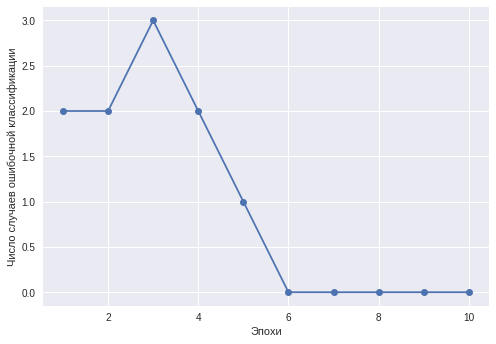

In [0]:
# check results

plt.plot(range(1, len(simple_perceptron.errors_)+1), simple_perceptron.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Число случаев ошибочной классификации')

plt.show()

# Часть 2. ADAptive LInear NEuron (Adaline)

Правило обучение ADALINE также известно как *правило Уидроу-Хопфа *, или дельта-правило. Основное отличие правила обучения ADALINE от правила персептона Розенблатта в том, что в нем для обновления весов используется **линейная функция активации**, а не единично ступенчетая как в персептроне. В Adaline эта функция активация $\phi(z)$ представляет собой просто тождественное отображение чистого входа, в результате чего $\phi(w^{T}x) = w^{T}x$.

Но!  
Помимо линейной функции активации, которая используется для извлечения весов, далее с целью определения меток класса используется **квантизатор** .

### Зачем???? Тоже самое же!

Но! Вместо бинарных меток классов теперь для вычисления ошибки модели и для обновления весов используется непрерывный выход из линейной функции активации.

Ключевой задачей обучения с учителем в МЛ является задание *целевой функции*, которую необходимо оптимизировать в ходе обучения. Эта целевая функция является обычно *функцией потерь (лосс функцией (loss))*.

В случае Adaline функцию потерь можно задать в виде **суммы квадратичных ошибок (sum of scuared errors, SSE)**: $J(w) = \frac{1}{2}\sum_{i=1}^n(y^{(i)} - \phi(z^{i}))^2$

 И ее преимущество в том, что она становится дифференцируемой. Еще она выпуклая => удобно ипользовать **метод градиентного спуска** для нахождения весов, которые минимизируют функцию потерь.  


$ w_j = w_j + \Delta w_j$ , где  
$\Delta w_j = - \eta \nabla J(w)$,  
$\eta $ - темп обучения

$\nabla J(w) = \frac{\delta J}{\delta w_j} = - \sum_{i} (y^{(i)} - \phi(z^{i}))x_j^{(i)}$.  (кто-нить сможет взять производную у доски?)

Тогда $\Delta w_j$ можно записать как: 
$\Delta w_j = - \eta \nabla J(w) = \eta\sum_{i} (y^{(i)} - \phi(z^{i}))x_j^{(i)}$. 

В отличие от простого персептрона, у алгоритма *Adaline* $\phi(z^{i})$ является вещественным числом (в обычном персептроне это было целое - метка класса).

К тому же здесь обновление весов происходит на основе всех сэмплов тренировочной выборки (вместо обновления после каждого образца). Такой подход называется "пакетным" (batch) градиентным спуском.

In [0]:
class AdalineGD(Perceptron):
  """
  Что надо переопределить, а что будет также?
  """
  
  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []
    
    for i in range(self.n_iter):
      output = self.count_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T @ errors
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      
      self.cost_.append(cost)
      
    return self
    
  def activation(self, X):
    return self.count_input(X)
  
  def predict(self, X):
    return 1 if self.activation(X) >= 0 else -1

In [0]:
# train model

ada_perceptron_1 = AdalineGD(eta=0.1, n_iter=10)
ada_perceptron_1.fit(X, y)

In [0]:
ada_perceptron_2 = AdalineGD(eta=0.000001, n_iter=10)
ada_perceptron_2.fit(X, y)

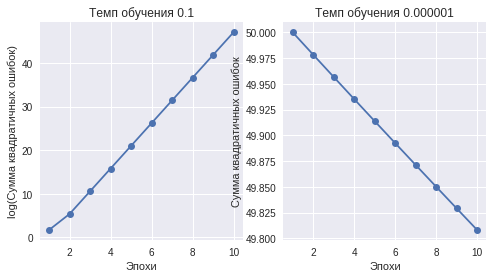

In [0]:
# check results on different speed values

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

ax[0].plot(range(1, len(ada_perceptron_1.cost_) + 1), np.log10(ada_perceptron_1.cost_), marker='o')
ax[0].set_xlabel("Эпохи")
ax[0].set_ylabel("log(Сумма квадратичных ошибок)")
ax[0].set_title("Темп обучения 0.1")

ax[1].plot(range(1, len(ada_perceptron_2.cost_) + 1), ada_perceptron_2.cost_, marker='o')
ax[1].set_xlabel("Эпохи")
ax[1].set_ylabel("Сумма квадратичных ошибок")
ax[1].set_title("Темп обучения 0.000001")

plt.show()

О чем говорят эти графики?

На правом графике - стоимость уменьшается.

На втором графике тем обучения настолько низок, что алгоритму потребовалось бы большое количество эпох.

# Часть 3. Stochastic Gradient Descent (SGD)

\- Какая сложность у алгоритма градиентного спуска?  
\- Кажется сложная.  


Что делать, когда данных очень много? Какие проблемы могут быть?
1. Долго считаться будет
2. Не влезет в ОП
3. Не влезет в видеокарту

Надо что-то делать.  
Популярной альтернативой является **Стохастический градиентный спуск**.  
Теперь мы будем обновлять веса инкрементно по каждому тренировочному образцу $\eta(y^{(i)} - \phi(z^{(i)}))x^{(i)}$  

---

Стохастический градиентный спуск можно рассматривать как [аппроксимацию](https://ru.wikipedia.org/wiki/%D0%90%D0%BF%D0%BF%D1%80%D0%BE%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D1%86%D0%B8%D1%8F) градиентного спуска. Обычно стохастический градиентный спуск достигает сходимости намного быстрее из-за более частых обновлений весов. Так как каждый градиент рассчитывается на одном тренировочном примере, поверхность ошибок более зашумленна, чем в традиционном градиентном спуске, что также является преимуществом, так как из-за этого он может лучше выходить из мелких локальных минимумов.  
  
---

Для точных результатов методом стохастического градиентного спуска важно предоставить ему данные в произвольном порядке. Для этого необходимо перемешивать выборку в каждой эпохе.

---

Также стохастический градиентный спуск можно использовать для динамического (онлайн) обучения. В динамическом обучении модель обучается по мере поступления новых данных. Используя динамическое обучение, система может сразу адаптироваться к изменениям, и тренировочные данные могут быть отброшены после обновления модели, в случае, когда количество памяти ограничено.

---

Компромиссом между градиентным спуском и стахостическим градиентным спуском является **мини-пакетное (mini-batch) обучение. Мини-пакетное обучение** - применение градиентного спуска к подмножествам данных меньшего размера, например, по 100 сэмплов за раз. 

Преимуществом такого подхода будет в том, что благодаря мини-пакетам сходимость достигается быстрее из-за более частых обновлений весов. 

In [0]:
from numpy.random import seed

class AdalineSGD(AdalineGD):
  """
  Атрибуты:
  random_state - генератор случайных чисел для перемешивания и инициализации весов
  
  Методы:
  __init__(какие параметры теперь должны быть?)
  fit(тут что-то изменится?)
  partial_fit
  _shuffle
  _initialize_weights
  _update_weights
  
  """
  
  def __init__(self, eta=0.1, n_iter=100, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    
    if random_state:
      seed(random_state)
      
  def fit(self, X, y):
    self._initialize_weights(X.shape[1])
    self.cost_ = []
    
    for i in range(self.n_iter):
      X, y = self._shuffle(X, y)
      cost = []
      
      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi, target))
        
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
     
    return self
  
  
  def partial_fit(self, X, y):
    "обучение без повторной инициализации весов"
    
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
  
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)
      
    return self
  
  
  def _shuffle(self, X, y):
    r = np.random.permutation(len(y))
    return X[r], y[r]
  
  
  def _initialize_weights(self, m):
    self.w_ = np.zeros(1 + m)
    self.w_initialized = True
    
    
  def _update_weights(self, xi, target):
    output = self.count_input(xi)
    error = (target - output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    
    cost = error ** 2 / 2.0
    
    return cost

  

In [0]:
# fit model

ada_sgd = AdalineSGD(n_iter=15, eta=0.1, random_state=1)
ada_sgd.fit(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in add


In [0]:
# check results

# сами

# Часть 4. Тестируем

In [0]:
#Сравнить с Sklearn